In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression

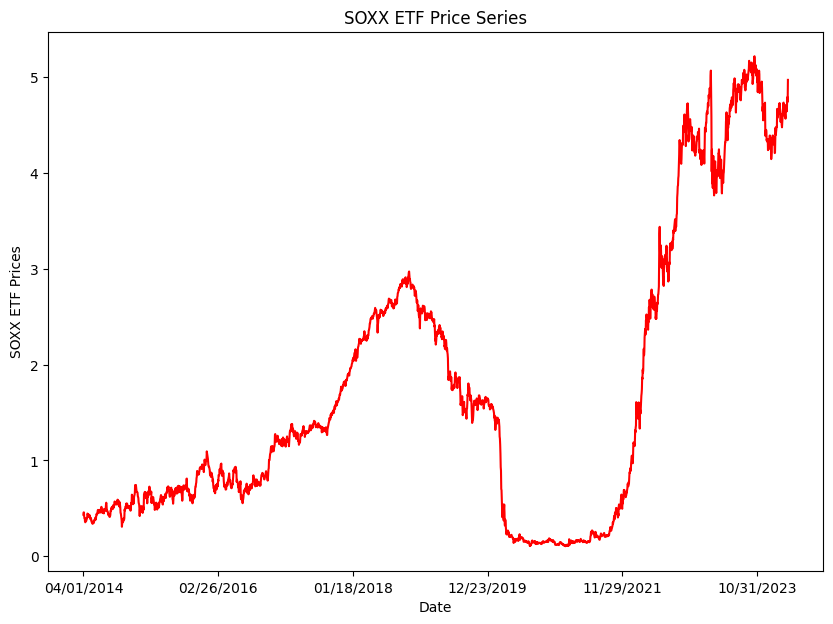

In [11]:
df  = pd.read_csv('2Y_Bond.csv')
df = df[['Date', 'Price']] # only date and price data
df = df.iloc[::-1] # reverse for chronological order
df.set_index('Date', inplace=True) # set date as index
df.rename(columns={'Price': 'Close'}, inplace=True) # rename to Close for analysis

df = df.dropna()
df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("2Y Bond Prices")
plt.title("2Y Bond Price Series")
plt.show()

In [12]:
# train: use moving averages over last 3 days and 9 days 
df['S_3'] = df['Close'].rolling(window=3).mean()
df['S_9'] = df['Close'].rolling(window=9).mean()
df['next_day_price'] = df['Close'].shift(-1)

df = df.dropna()
x = df[['S_3', 'S_9']]

y = df['next_day_price']

# separate testing and training data
index = int(0.8*(len(df)))
x_train, x_test, y_train, y_test = x[:index], x[index:], y[:index], y[index:]

# train linear regression
linear = LinearRegression().fit(x_train, y_train)

print("Linear Regression model")
print("2Y Bond Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
2Y Bond Price (y) = 1.31 * 3 Days Moving Average (x1) + -0.31 * 9 Days Moving Average (x2) + 0.00 (constant)


In [ ]:
# backtest: predict SOXX ETF price in test data
backtest_price = linear.predict(x_test)
backtest_price = pd.DataFrame(
    backtest_price, index=y_test.index, columns=['price'])
backtest_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['backtested_price', 'actual_price'])
plt.ylabel("2Y Bond ETF Price")
plt.show()

print(backtest_price)
# export to excel
export_df = pd.DataFrame({
    'dates': x_test.index,  # Assuming index contains dates
    'Historical Price': y_test,
    'Model Predicted Price': backtest_price['price']  # Assuming 'shuffle_predicted_price' is already defined
})

# Export the DataFrame to an Excel file
export_df.to_excel('2Y_backtest_results.xlsx', index=False)